---

# 2. Regular Languages
**[Emil Sekerinski](http://www.cas.mcmaster.ca/~emil/), McMaster University, September 2025**

---

### Regular Expressions

Regular expressions are closely related to regular languages and finite state automata.

The _regular expressions_ over a set `Σ` of symbols consist of

- any symbol `a ∈ Σ ∪ {ε}`,
- `E₁ | E₂`, where `E₁`, `E₂` are regular expressions (*choice*),
- `E₁ E₂`, where `E₁`, `E₂` are regular expressions (*concatenation*),
- `E*`, where `E` is a regular expression (*repetition*).

It is assumed that `ε ∉ Σ`. The operator for repetition is also called the Kleene star. Using EBNF, the abstract syntax of regular expressions is:

    E → 'ε' | Σ | E '|' E | E E | E '*'

When writing regular expressions, parentheses are used for grouping. By convention, repetition binds tighter than concatenation, which binds tighter than choice. That is, `ab*|c` is understood as `(a(b*))|c`. 

The language `L(E)` _described_ by regular expression `E` over set `T` of symbols is defined recursively over the structure of `E`. Assuming `a ∈ Σ ∪ {ε}` and `E`, `E₁`, `E₂` are regular expressions,

<div style="float:right;background-color:lightgrey;border-left:2em solid white">

**Example.**  

 `L(ab*|c)`  
`=  L(ab*) ∪ L(c)`  
`=  (L(a) L(b*)) ∪ L(c)`  
`=  ({a} (⋃ n ≥ 0 • Lⁿ(b))) ∪ {c}`  
`=  ({a} (⋃ n ≥ 0 • {b}ⁿ)) ∪ {c}`  
`=  (⋃ n ≥ 0 • {a}{b}ⁿ) ∪ {c}`  
</div>

| E | L(E)          |
|:-------------------|:------------------|
| `a`                | `{a}`             |
| `E₁│E₂`          | `L(E₁) ∪ L(E₂)`   |
| `E₁ E₂`            | `L(E₁) L(E₂)`     |
| `E*`               | `⋃ n ≥ 0 • Lⁿ(E)` |

where for sets `A`, `B` of sequences over `T`:

  `A B = {αβ | α ∈ A ∧ β ∈ B}`  
  `A⁰ = {ε}`  
  `Aⁿ = A Aⁿ⁻¹, n > 0`

For example, if `U = {u, v}` and `X = {x, y}`, then `U X = {ux, uy, vx, vy}`. Since `A¹ = A A⁰ = A {ε} = A`:

    L(E*) = {ε} ∪ L(E) ∪ L²(E) ∪ …

<div style="float:right;background-color:lightgrey;border-left:2em solid white">

**Example.**  

 `L([a | b])`  
`=  {ε} ∪ L(a | b)`  
`=  {ε} ∪ L(a) ∪ L(b)`  
`=  {ε} ∪ {a} ∪ {b}`  
`=  {ε, a, b}`
</div>

The notation `[E] = ε | E` is used to avoid writing `ε`. Consequently:

  `L([E]) = {ε} ∪ L(E)`

Sometimes `{E} = E*` is used, as in EBNF.

**Question.** What language does `[a a*]` describe? How can the expression be simplified? Give a formal proof!

_Answer._

       L([a a*])
    =  {ε} ∪ L(a a*)
    =  {ε} ∪ (L(a) L(a*))
    =  {ε} ∪ ({a} (⋃ n ≥ 0 • Lⁿ(a)))
    =  {ε} ∪ ({a} (⋃ n ≥ 0 • {a}ⁿ))
    =  {ε} ∪ (⋃ n ≥ 0 • {a}{a}ⁿ)
    =  {a}⁰ ∪ (⋃ n > 0 • {a}ⁿ)
    =  ⋃ n ≥ 0 • {a}ⁿ
    =  ⋃ n ≥ 0 • L(a)ⁿ
    =  L(a*)

That is, `[a a*]` describes the same language as `a*`.

<div style="float:right;background-color:lightgrey;border-left:2em solid white">

**Example.**  Taking `ab*|c`,  
  
 `L(ab*|c) = L(G)`  
  
where `G = (T, N, S, P}`  
with `T = {a, b, c}`, `N = {S}`,  
and `P = {S → a{b}|c}`
</div>

The similarity in the notation of regular expressions and productions in EBNF is justified by the following theorem, given without proof:

**Theorem.** For regular expression `E` over `Σ` and grammar `G` with the single non-recursive production `S → E`, the language described by `E` and the language generated by `G` are the same, `L(E) = L(G)`.

For regular expressions, equivalence is of fundamental importance. Regular expressions `E`, `E'` are *equal*, `E = E'`, if `L(E) = L(E')`; that is, a regular expression is identified with the set of sentences it describes. Given regular expressions `E`, `F`, `G` , the basic rules of choice and concatenation are:

- *Identity:* `E ε = ε E = E`
- *Idempotence:* `E | E = E`
- *Commutativity:* `E | F = F | E`
- *Associativity:* `(E F) G = E (F G)`
- *Associativity:* `(E | F) | G = E | (F | G)`
- *Distributivity:* `E (F | G) = E F | E G` and `(E | F) G = E G | F G`

Some of the basic rules of `*` are:
- `E* = [E E*]`
- `E E* = E* E`
- `E** = E*`
- `E* E* = E*`
- `(E | F)* = E* (F E*)*`
- `(E F)* E = E (F E)*`

Here is the proof of `E | F = F | E`:

        L(E | F)
    =  L(E) ∪ L(F)
    =  L(F) ∪ L(E)
    =  L(F | E)

That is, the proof of the commutativity of choice relies on the commutativity of union. Here is the proof of `E (F | G) = E F | E G`:

        L(E (F | G))
    =  L(E) L(F | G)
    =  L(E) (L(F) ∪ L(G))
    =  L(E) {b | b ∈ L(F) ∨ b ∈ L(G)}
    =  {a b | a ∈ L(E) ∧ (b ∈ L(F) ∨ b ∈ L(G))}
    =  {a b | (a ∈ L(E) ∧ b ∈ L(F)) ∨ (a ∈ L(E) ∧ b ∈ L(G))}
    =  {a b | a ∈ L(E) ∧ b ∈ L(F)} ∪ {a b | a ∈ L(E) ∧ b ∈ L(G)}
    =  L(E F) ∪ L(E G)
    =  L(E F | E G)

That is, the proof of distributivity of concatenation over choice relies on the distributivity of conjunction over disjunction.

*Aside.* If one adds `∅` with `L(∅) = {}` as the empty language, the regular expressions form a [Kleene algebra](https://en.wikipedia.org/wiki/Kleene_algebra) with following properties of `∅`:

- *Identity:* `E | ∅ = ∅ | E = E`
- *Annihilation:* `E ∅ = ∅ E = ∅`

Having `∅` in regular expressions for searching text is not intuitive and is not used. However, Kleene algebras have applications to programming, with `∅`, `ε` corresponding to `stop`, `skip` and with concatenation, choice, and repetition (star) corresponding to sequential composition, nondeterministic choice, and repetition. In that case, the underlying model is that of relations, with sequential composition being relational composition and nondeterministic choice being union. _Kleene algebras with tests_ distinguish between statements and guards (tests) and allow while-programs to be expressed; see Kozen's tutorial [Part 1](https://www.cl.cam.ac.uk/events/ramics13/KozenTutorial1.pdf) and [Part 2](https://www.cl.cam.ac.uk/events/ramics13/KozenTutorial2.pdf).

In Python, we use classes to construct regular expressions: constructors `Sym(a)`, `Choice(E₁, E₂)`, `Conc(E₁, E₂)`, and `Star(E)` create objects that represent `a`, `E₁ | E₂`, `E₁ E₂`, and `E*`, respectively:

In [1]:
class RegEx: pass

class ε(RegEx):
    def __repr__(self): return 'ε'

class Sym(RegEx):
    def __init__(self, a: str): self.a = a
    def __repr__(self): return str(self.a)

class Choice(RegEx):
    def __init__(self, E1: RegEx, E2: RegEx): self.E1, self.E2 = E1, E2
    def __repr__(self): return '(' + str(self.E1) + '|' + str(self.E2) + ')'

class Conc(RegEx):
    def __init__(self, E1: RegEx, E2: RegEx): self.E1, self.E2 = E1, E2
    def __repr__(self): return '(' + str(self.E1) + str(self.E2) + ')'

class Star(RegEx):
    def __init__(self, E: RegEx): self.E = E
    def __repr__(self): return '(' + str(self.E) + ')*'

Symbols are represented by characters, with `''` representing `ε`. For example, `[ab*]` is represented as:

In [2]:
E1 = Choice(Star(Conc(Sym('a'), Sym('b'))), ε()); E1

(((ab))*|ε)

### Regular Grammar to Regular Expression

For every regular grammar `G`, we can construct a regular expression `E` such that `L(G) = L(E)` by transforming the productions of the grammar. The assumption is that the grammar is in BNF, with one production for everyone nonterminal, including one for the start symbol `S`. The grammar is transformed by several steps with intermediate grammars in EBNF. An EBNF production of the form

    A → E A | F

where `A` does not occur in `E`, `F`, is equivalent to (*Arden's Rule*)

    A → E* F

which can be used to replace `A` with `E* F` in all other productions. This is repeated until a single production for `S` is left, whose right-hand side is the equivalent regular expression.

    X → b X | c Y
    Y → a X | c

    X → b X | c (a X | c)

    X → b X | ca X | cc

    X → (b | ca)* cc

    X → b X | c Y
    Y → a X | c

    X → b* c Y
    Y → a X | c

    X → b* c (a X | c)

    X → b* ca X | b* cc


**Example.** Given regular grammar with productions

    S → a | b X      X → b X | c Y      Y → c

first, the last production can be eliminated by replacing `Y` with `c` in all other productions:

    S → a | b X      X → b X | c c

An equivalent production for `X` is `X → b* c c`, which allows `X` to be replaced by `b* c c`:

    S → a | b b* c c

Thus, an equivalent regular expression is `a | bᐩ c c`.

**Question.** What is an equivalent regular expression for the grammar with productions:

    S → a S | b X
    X → a X | b Y | a
    Y → a Y | a

_Answer._

    S → a S | b X      X → a X | b Y | a      Y → a Y | a

An equivalent production for `Y` is `Y → a* a`, which allows `Y` to be replaced by `aᐩ`:

    S → a S | b X      X → a X | b aᐩ | a

The production for `X` can be written as `X → a X | (b aᐩ | a)`, which matches the form that is needed for it to be rewritten as `X → a* (b aᐩ | a)`, which in turn allows `X` to be eliminated from the other productions:

    S → a S | b (a* (b aᐩ | a))

Now, `S` can be equivalently defined by `S → a* b (a* (b aᐩ | a))`. The regular expression equivalent to the grammar is therefore:

    a* b (a* (b aᐩ | a))

### Finite State Automata

<div style="float:right;background-color:lightgrey;border-left:2em solid white">

**Example.** `A₀ = (Σ, Q, I, δ, F)`  
with `Σ = {a, b, c}`, `Q = {q₀, q₁, q₂}`,  
`I = {q₀}`, `F = {q₂}`, and `δ`:  
`    q₀ a → q₁`  
`    q₁ b → q₁`  
`    q₁ c → q₂`  
`    q₀ c → q₂`  
This defines `δ` as:  
`    δ q₀ a = {q₁}`  
`    δ q₀ b = {}`  
`    δ q₀ c = {q₂}`  
`    δ q₁ a = {}`  
`    δ q₁ b = {q₁}`  
`    δ q₁ c = {q₂}`  
`    δ q₂ a = {}`  
`    δ q₂ b = {}`  
`    δ q₂ c = {}`  
</div>

A finite state automaton `A = (Σ, Q, I, δ, F)` is specified by
- a finite set `Σ` of *(input) symbols*,
- a finite set `Q` of *states*,
- a set of _initial states_ `I ⊆ Q`,
- a *transition function*, `δ: Q → Σ → 𝒫Q`,
- a set of _final states_ `F ⊆ Q`.

A triple written as `p a → q` is a *transition* if `q ∈ δ a p` for `p, q ∈ Q` and `a ∈ Σ`. The transition function can be specified as a set of such transitions, for example, as in `A₀` to the right.

A finite state automaton is given a sequence `α ∈ Σ*` as input and starts in any initial state. A transition `p a → q` allows it to move from state `p` to state `q` while consuming symbol `a` from the input.

The components of `A = (Σ, Q, I, δ, F)` are referred to by `A.Σ`, `A.Q`, `A.I`, `A.δ`, and `A.F`.

<img style="width:16em;float:right" src="./img/A0.svg"></img>
Finite state automata can be graphically represented by *finite state diagrams*:
- States are enclosed in a circle.
- Transitions are arrows between states labelled with a symbol.
- Arrows point to the initial states.
- Each final state is enclosed in a double circle.

With the execution of finite state automata in mind, we define a Python class `FiniteStateAutomaton` and a procedure `parseFSA` for creating a `FiniteStateAutomaton` object from a textual representation of the following form:

    initial, initial, ...
    source symbol → target
    source symbol → target
    final, final, ...
    ...

The vocabulary becomes all the symbols that appear in the transitions. The set of states becomes all the initial states, final states, and states mentioned in transitions. Empty lines are allowed. Symbols must be individual characters. States can be arbitrary strings. Later on, sets of sets of states will be considered. Python does not allow a `set` object with `set` elements to be constructed: elements must have a hash method defined for fast checking of membership, but that is only defined for immutable data types like `str` and `frozenset`, not for `set`. Therefore, `frozenset` is used for states:

In [3]:
def wrap(a):
    import textwrap
    return  '\\n'.join(textwrap.wrap(str(a), width=12))

TransFunc = dict[str, dict[str, set[str]]]

class FiniteStateAutomaton:
    Σ: set[str] # set of symbols
    Q: set[str] # set of states
    I: set[str] # I ⊆ Q, the initial states,
    δ: TransFunc # representing Σ → 𝒬 → 𝒫𝒬, the transition function
    F: set[str] # F ⊆ Q, the finite states
    vars = () # for reduced FSAs, the names of the original variables
    def __init__(self, Σ, Q, I, δ, F):
        self.Σ, self.Q, self.I, self.δ, self.F = Σ, frozenset(Q), frozenset(I), δ, frozenset(F)
    def draw(self, trace = None):
        from graphviz import Digraph
        dot = Digraph(graph_attr={'rankdir':'LR'},
                      node_attr={'fontsize': '10', 'fontname': 'Noto Sans', 'margin': '0', 'width': '0.25'}, # 'nodesep': '0.75', 'ranksep': '0.75'
                      edge_attr={'fontsize': '10', 'fontname': 'Noto Sans', 'arrowsize': '0.5'}) # 'weight': '5.0' # create a directed graph
        for q in self.I:
            dot.node('_' + str(q), label = '', shape = 'none', height = ".0", width = ".0") 
            dot.node(wrap(q), shape = 'circle')
            dot.edge('_' + str(q), wrap(q), len = '.1')
        P = self.I | self.F
        for q in self.δ:
            P = P | {q}
            for a in self.δ[q]:
                dot.node(wrap(q), shape = 'circle')
                for r in self.δ[q][a]:
                    dot.node(wrap(r), shape = 'circle')
                    dot.edge(wrap(q), wrap(r), label = str(a))
                    P = P | {r}
        for q in self.F: dot.node(wrap(q), shape = 'doublecircle')
        for q in self.Q - P: # place all unreachable nodes to the right
            dot.node(wrap(q), shape = 'circle')
            for p in P: dot.edge(wrap(p), wrap(q), style='invis') # , constraint='false'
        if trace:
            xlab = {} # maps states to Graphviz external labels
            for i in range(0, len(trace), 2):
                xlab[trace[i]] = xlab[trace[i]] + ', ' + str(i // 2) if trace[i] in xlab else str(i // 2)
            for q in xlab:
                dot.node(wrap(q), xlabel = '<<font color="royalblue">' + wrap(xlab[q]) + '</font>>')
        return dot
    def writepdf(self, name, trace = None):
        open(name, 'wb').write(self.draw(trace).pipe(format='pdf'))
    def writesvg(self, name, trace = None):
        open(name, 'wb').write(self.draw(trace).pipe(format='svg'))
    def __repr__(self):
        return ' '.join(str(q) for q in self.I) + '\n' + \
               '\n'.join(str(q) + ' ' + str(a) + ' → ' + ', '.join(str(r) for r in self.δ[q][a]) \
                         for q in self.δ for a in self.δ[q] if self.δ[q][a] != set()) + '\n' + \
               ' '.join(str(f) for f in self.F) + '\n'

def parseFSA(fsa: str) -> FiniteStateAutomaton:
    fl = [line for line in fsa.split('\n') if line != '']
    I = set(fl[0].split()) if len(fl) > 0 else set() # second line: initial initial ...
    Σ, Q, δ, F = set(), set(), {}, set()
    for line in fl[1:]: # all subsequent lines
        if '→' in line: # source action → target
            l, r = line.split('→'); p, a, q = l.split()[0], l.split()[1], r.split()[0]
            if p in δ: s = δ[p]; s[a] = s[a] | {q} if a in s else {q}
            else: δ[p] = {a: {q}}
            Σ.add(a); Q.add(p); Q.add(q)
        else: # a line without → is assumed to have the final states
            F = set(line.split()) if len(line) > 0 else set() # final final ...
    return FiniteStateAutomaton(Σ, Q | I | F, I, δ, F)

The method `__repr__` is called when an object is printed; it prints an automaton in the same format as `parseFSA` expects as input. For example, for `A₀` as earlier:

In [4]:
A0 = parseFSA("""
q₀
q₀ a → q₁
q₀ c → q₂
q₁ b → q₁
q₁ c → q₂
q₂
"""); A0

q₀
q₀ a → q₁
q₀ c → q₂
q₁ b → q₁
q₁ c → q₂
q₂

The method `draw` uses the automatic layout of GraphViz to display an automaton from left to right.

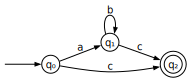

In [5]:
A0.draw()

In [6]:
aʹ = 3

Given transition function `δ: Q → Σ → 𝒫Q`, the extension `δʹ: 𝒫Q → Σ → 𝒫Q` to a set of states is defined by:

    δʹ P a = (∪ p ∈ P • δ p a)

For example:

    A₀.δʹ ∅ a = ∅
    A₀.δʹ {q₁} c = {q₂}
    A₀.δʹ {q₀, q₁} b = {q₁}

The equality `δʹ P a = Q` can also be written as `P a ⇒ Q`, provided `δ` is understood from the context. With an implementation in mind, we mainly use the notation that explicitly mentions `δ`.

Python does not allow a postfix operator like `ʹ` to be defined; instead, we define a function `δʹ` that takes `δ` as a parameter. As `set.union` does not support the union of an empty set of sets, we define our own generalized set union:

In [7]:
def setunion(S: set[set]) -> set:
    return set.union(set(), *S)

def δʹ(δ: TransFunc, P: set[str], a: str) -> set[str]:
    return frozenset(setunion(δ[p][a] for p in P if p in δ if a in δ[p]))

In [8]:
assert δʹ(A0.δ, set(), 'a') == set()
assert δʹ(A0.δ, {'q₁'}, 'c') == {'q₂'}
assert δʹ(A0.δ, {'q₀', 'q₁'}, 'b') == {'q₁'}

The extension `δ* 𝒫Q → Σ* → 𝒫Q` to a set of states and a sequence of symbols is defined by:

    δ* P ε = P   and   δ* P (aα) = δ* (δʹ P a) α

For example:

    A₀.δ* {q₀} ε = {q₀}
    A₀.δ* {q₁} c = {q₂}
    A₀.δ* {q₀} abc = {q₂}

The equality `δ* P α = Q` can also be written as `P α ⇒* Q`, provided `δ` is understood from the context. With this notation, `⇒*` is inductively defined by:
- `P ε ⇒* Q`
- `P aα ⇒* Q` if `P a ⇒ R` and `R α ⇒* Q` for some set `R` of states

The Python implementation of `δ*` allows the sequence to be a string, a tuple, or a list. If it is a string, the symbols are single characters. 

In [9]:
def δˣ(δ: TransFunc, P: set[str], α: str | tuple | list) -> set[str]:
    return P if len(α) == 0 else δˣ(δ, δʹ(δ, P, α[0]), α[1:])

In [10]:
assert δˣ(A0.δ, {'q₀'}, '') == {'q₀'}
assert δˣ(A0.δ, {'q₁'}, 'c') == {'q₂'}
assert δˣ(A0.δ, {'q₀'}, 'abc') == {'q₂'}

The set `A.reachable(α)` is all states of `A` that can be reached from its initial states; it is `A.δ*` with the first argument being `A.I`:

    A.reachable(α) = A.δ* A.I α

The method `reachable` is added to the class `FiniteStateAutomaton`:

In [11]:
def reachable(A: FiniteStateAutomaton, α: str):
    return δˣ(A.δ, A.I, α)

setattr(FiniteStateAutomaton, 'reachable', reachable)

In [12]:
assert A0.reachable('a') == {'q₁'} and A0.reachable('ac') == {'q₂'}
assert A0.reachable('b') == set() and A0.reachable('cc') == set()

if `αβ` is reachable, so is `α`. That is, the set of traces to reachable states is *prefix closed*.


Finite state automaton `A` is _deterministic_ if
1. it has at most one initial state, and
2. in every state and for any input, at most one transition can be taken.

Otherwise, it is _nondeterministic._ For example, `A1` is nondeterministic, as in state `0` on input `a`, transitions to `1` or `3` can be taken.

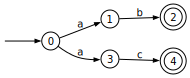

In [13]:
A1 = parseFSA("""
0
0 a → 1
1 b → 2
0 a → 3
3 c → 4
2 4
"""); A1.draw()

Both `1` and `3` are reachable by `a`:

In [14]:
assert A1.reachable('a') == {'1', '3'}

Automaton `A` *accepts* sequence `α ∈ Σ*` if a final state is reachable by `α`.

    A.accepts(α) = A.reachable(α) ∩ A.F ≠ ∅

While the definition of `A.accepts(α)` leads immediately to an implementation, it involves recursion, as `δ*` is defined recursively. Acceptance can also be implemented iteratively by maintaining a set `W` of states to be worked on:

    A.accepts(α) =
        W := A.I
        for a in α do
            W := A.δʹ W a
        return W ∩ A.F ≠ ∅

For example, on input `ac` to automaton `A1`, the set `W` takes consecutively the values:

    {0}, {1, 3}, {4}

The invariant of the loop is that on the `i`-th iteration, `W` is the reachable states on the first `i` elements of `α`:

    W = A.δ* A.I α[0:i]

In [15]:
def accepts(A: FiniteStateAutomaton, α: str):
    W = A.I
    for a in α:
        W = δʹ(A.δ, W, a)
    return W & A.F != set()

setattr(FiniteStateAutomaton, 'accepts', accepts)

In [16]:
assert not A1.accepts('a') and A1.accepts('ab') and not A1.accepts('abc')

The algorithm considers the set of all states in which `A` could be after accepting a prefix of `α`. The memory this set takes can be avoided by using recursion instead. For example, in `A1` with `a` as first input symbol, the transition to `1` or to `2` is arbitrarily taken. If the whole input is `ac` and the transition to `1` was taken, the automaton would need to backtrack to state `0` and take the transition to `2` instead. To see how much backtracking is needed, consider `A2`. If the input is `aⁿc` and the first transition to `1` was taken, the automaton must backtrack `n` transitions. As in general nondeterminism can arise with every state, backtracking may require in the order of `2ⁿ` paths to be explored for an input of length `n`. The above algorithm for acceptance trades runtime for memory.

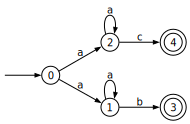

In [17]:
A2 = parseFSA("""
0
0 a → 1
0 a → 2
1 a → 1
2 a → 2
1 b → 3
2 c → 4
3 4
"""); A2.draw()

**Question.** What is an equivalent deterministic finite state automaton? How is it constructed?

<img style="width:18em;float:right" src="./img/dfa.svg"/>

*Answer.* A deterministic finite state automaton can be constructed by unifying the states `1` and `2` of the original automaton.

The language `L(A)` of automaton `A` is the set of all `α` that are accepted:

 	L(A) = {α ∈ Σ* | A.accepts(α)}

The language of an automaton can be infinite. It therefore cannot be returned by an implementation. Python allows to use of generators for this purpose: `L(A)` is a generator that returns the next accepted string, starting with the empty string and enumerating all strings of the same length in the order of `A.Σ`:

In [18]:
import itertools

def L(A: FiniteStateAutomaton):
    n = 0
    while True:
        for α in itertools.product(A.Σ, repeat = n):
            α = ''.join(α)
            if A.accepts(α): yield α
        n += 1

In the for-loop, `α` becomes a tuple of characters; the assignment `α = ''.join(α)` converts that to a string for consistency and readability.

In [19]:
g = L(A0); g

<generator object L at 0x10ca3a420>

In [20]:
next(g), next(g), next(g)

('c', 'ac', 'abc')

For example, all accepted strings of length less than eight are produced by:

In [21]:
g = L(A0); [next(g) for i in range(8)]

['c', 'ac', 'abc', 'abbc', 'abbbc', 'abbbbc', 'abbbbbc', 'abbbbbbc']

Consider deterministic automaton `A2`. We claim that it accepts the same language as `A1`, namely `L(A1) = {ab, ac} = L(A2)`:

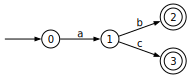

In [22]:
A2 = parseFSA("""
0
0 a → 1
1 b → 2
1 c → 3
2 3
"""); A2.draw()

Automata `A` and `B` are _equivalent_ if they accept the same language, `L(A) = L(B)`. By extension, grammars, regular expressions, and automata are equivalent if they generate, describe, and accept the same language.

**Question.** What is the language accepted by `A₀`? What is an equivalent regular expression? What is an equivalent regular grammar?

_Answer._
- Accepted language: `{abⁿc | n ≥ 0} ∪ {c}`
- Regular expression: `ab*c | c`
- Productions of regular grammar: `A → a B | c`, `B → b B | c`

Although the language of an automaton can be infinite, the equivalence of automata is decidable. For this, a correspondence between their states is established. More precisely, due to possible nondeterminism, a set of states of `A` has to be equivalent to a set of states of `B`, meaning that either both contain a final state or neither contains a final state. In the algorithm below, `W` (work) contains pairs of such sets that need to be checked for equivalence and `V` (visited) contains pairs that were already established to be equivalent. The set `W` initially contains a pair with `A.I` and `B.I`. As long as `W` still has a pair of states, one pair `P, Q` is arbitrarily chosen. If `P` and `Q` are equivalent, new pairs `A.δʹ P a, B.δʹ Q a` are added to `W` for all possible inputs `a`:

```lua
    equiv(A, B: FiniteStateAutomaton) → bool
        W, V := {(A.I, B.I)}, ∅
        while W ≠ ∅ do
            P, Q :∈ W ; W := W \ {(P, Q)}
            if (P, Q) ∉ V then
                if P ∩ A.F = ∅ ≢ Q ∩ B.F = ∅ then return false
                for a ∈ A.Σ ∪ B.Σ do
                    W := W ∪ {(A.δʹ P a, B.δʹ Q a)}
                V := V ∪ {(P, Q)}
        return true
```

The nondeterministic assignment statement `x :∈ S` assigns an arbitrary element of the set `S` to `x`; it is sometimes written as `choose x from S`. Above, since `W` is a set of pairs, the statement `P, Q :∈ W` selects a pair of `W` and assigns its components to `P` and `Q`. In the Python implementation, `P, Q = W.pop()` assigns a pair to `P, Q` and removes it from `W`:

In [23]:
def equiv(A: FiniteStateAutomaton, B: FiniteStateAutomaton, log = False) -> bool:
    W, V = {(A.I, B.I)}, set() # work, visited
    while W != set():
        P, Q = W.pop()
        if (P, Q) not in V:
            if log: print('checking', P, Q)
            if (P & A.F == set()) != (Q & B.F == set()): return False
            for a in A.Σ | B.Σ:
                W |= {(δʹ(A.δ, P, a), δʹ(B.δ, Q, a))}
            V |= {(P, Q)}
    if log: print('equivalent', V)
    return True

In [24]:
assert equiv(A1, A2)

By setting the `log` parameter to `True`, the pairs of sets that are checked can be observed:

In [25]:
equiv(A1, A2, True)

checking frozenset({'0'}) frozenset({'0'})
checking frozenset({'1', '3'}) frozenset({'1'})
checking frozenset({'2'}) frozenset({'2'})
checking frozenset() frozenset()
checking frozenset({'4'}) frozenset({'3'})
equivalent {(frozenset({'2'}), frozenset({'2'})), (frozenset(), frozenset()), (frozenset({'1', '3'}), frozenset({'1'})), (frozenset({'4'}), frozenset({'3'})), (frozenset({'0'}), frozenset({'0'}))}


True

- Initially, the pair `{0}, {0}`, the intial states of `A1` and `A2`, are considered.
- From `{0}, {0}`, input `a` adds `{1, 3}, {1}` and inputs `b` and `c` add `∅, ∅` to `W`.
- From `{1, 3}, {1}`, input `a` adds `∅, ∅`, input `b` adds `{2}, {2}`, and input `c` adds `{4}, {3}` to `W`
- The remaining pairs in `W` keep adding `∅, ∅` to `W`.

Consider now `A3`; it accepts `ab`, like `A2`, but does not accept `ac`. 

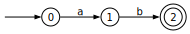

In [26]:
A3 = parseFSA("""
0
0 a → 1
1 b → 2
2
"""); A3.draw()

Automata `B` *includes* automaton `A` if `L(A) ⊆ L(B)`. For example, `A2` includes `A3`, as all sequences accepted by `A3` are also accepted by `A2`. The algorithm for the equivalence of automata can be modified for inclusion. If `A` accepts an input but `B` does not, then `B` does not include `A`; only the condition of the if-statement is modified:

```lua
    incl(A, B: FiniteStateAutomaton) → bool
        W, V := {(A.I, B.I)}, ∅
        while W ≠ ∅ do
            P, Q :∈ W ; W := W \ {(P, Q)}
            if (P, Q) ∉ V then
                if P ∩ A.F ≠ ∅ ∧ Q ∩ B.F = ∅ then return false
                for a ∈ A.Σ ∪ B.Σ do
                    W := W ∪ {(A.δʹ P a, B.δʹ Q a)}
                V := V ∪ {(P, Q)}
        return true
```

In [27]:
def incl(A: FiniteStateAutomaton, B: FiniteStateAutomaton, log = False) -> bool:
    W, V = {(A.I, B.I)}, set() # work, visited
    while W != set():
        P, Q = W.pop()
        if (P, Q) not in V:
            if log: print('checking', P, Q)
            if (P & A.F != set()) and (Q & B.F == set()): return False
            for a in A.Σ | B.Σ:
                W |= {(δʹ(A.δ, P, a), δʹ(B.δ, Q, a))}
            V |= {(P, Q)}
    return True

For example:

In [28]:
assert incl(A3, A2) and incl(A3, A1)
assert incl(A1, A2) and incl(A2, A1)

### Regular Expression to Finite State Automaton

For every regular expression, an equivalent finite state automaton can be constructed recursively over the structure of the expression. Recall that the abstract syntax of regular expressions is:

    E → 'ε' | Σ | E '|' E | E E | E '*'

<div style="float:right;border-left:2em solid white">

| RE        | automaton                                                        |
|:----------|:-----------------------------------------------------------------|
| `ε`       | <img align="left" style="width:4em" src="./img/fsaeps.svg"/>     |
| `a`       | <img align="left" style="width:10em" src="./img/fsaa.svg"/>      |
| `E₁ │ E₂` | <img align="left" style="width:12em" src="./img/fsaE1orE2.svg"/> |
| `E₁ E₂`   | <img align="left" style="width:20em" src="./img/fsaE1E2.svg"/>   |
| `E*`      | <img align="left" style="width:13em" src="./img/fsaEstar.svg"/>  |
</div>

An automaton recognizing regular expression `E` is visualized with a dashed arrow representing all transitions leaving the initial state and a dotted arrow to each of the final states representing all transitions targeting that final state:

<img style="width:12em" src="./img/fsaE.svg"/>

The table to the right illustrates the construction:

- The automaton for `ε` consists only of an initial state, which is also the final state.
- The automaton for `a` consists of a transition on `a` from the initial to the final state.
- The automaton for `E₁ │ E₂` consists of all transitions of the automata for `E₁` and `E₂` with the initial states merged.
- The automaton for `E₁ E₂` consists of all transitions of the automata for `E₁` and `E₂` but with the transitions leaving the initial state of `E₂` replicated to leave all final states of `E₁`. If the initial state of `E₂` was final, then the final states of `E₁` become final.
- The automaton for `E*` consists of all transitions of the automaton for `E` but with the transitions leaving the initial state of `E` replicated to leave all final states of `E`. The initial state of `E` becomes also a final state.

**Question.** What are the steps to construct an automaton for `(ab)*|c`?

The Python implementation below closely follows the algorithm. All states are given unique numbers by maintaining a global counter, `QC`, with the next state's name. In the case of `Choice`, the initial states are unified by taking that of one of the automata and renaming the initial state in the other automaton.